# Model
## iCGB21FR

In [1]:
from colorama import init, Fore, Style
from cobra import Model, Reaction
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Add lysine export reaction to the model

In [2]:
model = read_sbml_model('/Users/macintosh/Downloads/iCGB21FR.xml')

lys_exp_rxn = Reaction("LYSt3r")
lys_exp_rxn.name = "L lysine transport out via proton antiport reversible" #Addition of Lysine transport
lys_exp_rxn.add_metabolites({model.metabolites.h_e: -1, model.metabolites.lys__L_c: -1, model.metabolites.h_c: 1, model.metabolites.lys__L_e: 1})
lys_exp_rxn.gene_reaction_rule = "( Mbar_A2583 or Mbar_A3244 )"
lys_exp_rxn.lower_bound, lys_exp_rxn.upper_bound = 0, 1000

model.add_reactions([lys_exp_rxn])

model

SBML package 'layout' not supported by cobrapy, information is not parsed
https://juser.fz-juelich.de/record/188973 does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id


Name,iCBG21FR
Memory address,10497bd10
Number of metabolites,1042
Number of reactions,1540
Number of genes,807
Number of groups,102
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [3]:
solution = model.optimize()
solution.fluxes

12DGR120tipp     0.0
12DGR140tipp     0.0
12DGR161tipp     0.0
12DGR180tipp     0.0
12DGR181tipp     0.0
                ... 
L_LACtex         0.0
CYTB1           20.0
EX_34dhbz_e      0.0
3_4DHBZt2        0.0
LYSt3r           0.0
Name: fluxes, Length: 1540, dtype: float64

In [4]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.03095,0,0.00%
cl_e,EX_cl_e,0.03499,0,0.00%
cu2_e,EX_cu2_e,0.01952,0,0.00%
fe2_e,EX_fe2_e,0.02221,0,0.00%
fe3_e,EX_fe3_e,0.02221,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
h_e,EX_h_e,10,0,0.00%
k_e,EX_k_e,0.03173,0,0.00%
mg2_e,EX_mg2_e,0.05104,0,0.00%
mn2_e,EX_mn2_e,0.02258,0,0.00%


In [5]:
for metabolite in model.metabolites.query('Lys', 'name'):
    print(metabolite.name)
    print(metabolite.id)

L-Lysine
lys__L_c
L-Lysine
lys__L_e
L-Lysine
lys__L_p


In [6]:
model.metabolites.get_by_id('lys__L_c')

Metabolite identifier,lys__L_c
Name,L-Lysine
Memory address,0x14fb94350
Formula,C6H15N2O2
Compartment,c
In 6 reaction(s),"LYSabcpp, LYSabc, LYSt3r, LYSt3pp, Growth, DAPDC"


In [7]:
model.metabolites.lys__L_c.reactions

frozenset({<Reaction DAPDC at 0x159a39f90>,
           <Reaction Growth at 0x15a5a1990>,
           <Reaction LYSabc at 0x159edb050>,
           <Reaction LYSabcpp at 0x159ed8590>,
           <Reaction LYSt3pp at 0x159edbe90>,
           <Reaction LYSt3r at 0x159f27f50>})

In [8]:
for reaction in model.metabolites.lys__L_c.reactions:
    print(reaction.id, reaction, reaction.name)

LYSabcpp LYSabcpp: atp_c + h2o_c + lys__L_p --> adp_c + h_c + lys__L_c + pi_c L-lysine transport via ABC system (periplasm)
LYSabc LYSabc: atp_c + h2o_c + lys__L_e --> adp_c + h_c + lys__L_c + pi_c L-lysine transport via ABC system
LYSt3r LYSt3r: h_e + lys__L_c --> h_c + lys__L_e L lysine transport out via proton antiport reversible
LYSt3pp LYSt3pp: h_p + lys__L_c --> h_c + lys__L_p L-lysine transport out via proton antiport (cytoplasm to periplasm)
Growth Growth: 0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366 asp__L_c + 52.4155146188655 atp_c + 0.0542420540814976 ca2_c + 0.0613181689413663 cl_c + 0.00284729052433628 coa_c + 0.129291683621802 ctp_c + 0.0342100689811831 cu2_c + 0.0886878118620952 cys__L_c + 0.0114582929862282 datp_c + 0.0144799266879183 dctp_c + 0.0127140840198214 dgtp_c + 0.0117989352923303 dttp_c + 0.000215957436615497 fad_

In [9]:
model.reactions.DAPDC

Reaction identifier,DAPDC
Name,Diaminopimelate decarboxylase
Memory address,0x159a39f90
Stoichiometry,"26dap__M_c + h_c --> co2_c + lys__L_c Meso-2,6-Diaminoheptanedioate + H+ --> CO2 + L-Lysine"
GPR,lcl_NC_006958_1_prot_WP_011014180_1_1145 or lcl_NC_006958_1_prot_WP_011265883_1_2027
Lower bound,0.0
Upper bound,1000.0


### Changing the objective function
Determine the maximum possible production rate of lysine

In [10]:
with model:
    model.objective = model.reactions.EX_lys__L_e
    print(model.optimize().objective_value)

9.43333333333333


The maximum prosible production rate of lysine with iCGB21FR is 9.43

### Model Fluxes Check

In [11]:
model.optimize()

,fluxes,reduced_costs
12DGR120tipp,0.000000e+00,0.000000e+00
12DGR140tipp,0.000000e+00,0.000000e+00
12DGR161tipp,0.000000e+00,0.000000e+00
12DGR180tipp,0.000000e+00,0.000000e+00
12DGR181tipp,0.000000e+00,2.775558e-17
...,...,...
L_LACtex,0.000000e+00,1.311885e-16
CYTB1,2.000000e+01,0.000000e+00
EX_34dhbz_e,-3.173216e-13,0.000000e+00
3_4DHBZt2,3.173216e-13,0.000000e+00


In [12]:
solution = model.optimize()

In [13]:
solution.fluxes

12DGR120tipp     0.0
12DGR140tipp     0.0
12DGR161tipp     0.0
12DGR180tipp     0.0
12DGR181tipp     0.0
                ... 
L_LACtex         0.0
CYTB1           20.0
EX_34dhbz_e      0.0
3_4DHBZt2        0.0
LYSt3r           0.0
Name: fluxes, Length: 1540, dtype: float64

In [14]:
type(solution.fluxes)

pandas.core.series.Series

In [15]:
solution.fluxes.describe()

count    1540.000000
mean        0.094598
std         2.046961
min       -28.451381
25%         0.000000
50%         0.000000
75%         0.000000
max        30.360273
Name: fluxes, dtype: float64

#### Histogram of the distribution of flux values:

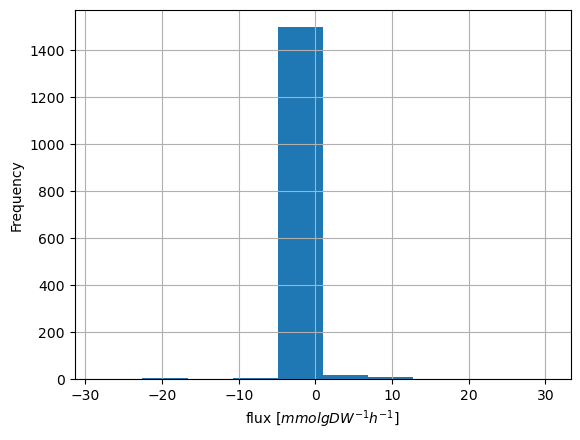

In [16]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [17]:
solution.fluxes[solution.fluxes != 0.]

ACGK            0.163466
ACHBS           0.160557
ACLS            0.484461
ACONT           5.330763
ACOTA          -0.163466
                 ...    
Ca2t2           0.030954
PRFGS_1         0.242579
FRD7            0.123459
GLYCLTt2rpp    -1.423596
CYTB1          20.000000
Name: fluxes, Length: 297, dtype: float64

The model is checked for fluxes